In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982556e+07,1.982556e+07,False,NaN,1,NaN,NaN,None,2025-02-17T13:06:00.000Z,96327.517238,1.874098e+10,19.5464,0.104630,-0.811192,-1.177869,-6.710701,-5.538352,4.098748,1.909747e+12,59.4259,2.022878e+12,None,2025-02-17T13:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
1,1027,Ethereum,ETH,ethereum,9932,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205553e+08,1.205553e+08,True,NaN,2,NaN,NaN,None,2025-02-17T13:07:00.000Z,2763.719868,1.535556e+10,52.1528,0.106043,2.198267,4.456639,-15.782328,-24.881832,-11.729862,3.331810e+11,10.3703,3.331810e+11,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-17T13:07:00.000Z,2.683269,4.289155e+09,18.7164,0.096880,-2.801680,11.005607,-15.184322,12.887311,142.274322,1.551436e+11,4.8289,2.683269e+11,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
3,825,Tether USDt,USDT,tether,116935,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.419965e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-17T13:07:00.000Z,1.000146,5.936331e+10,33.6926,0.016189,-0.017346,0.000132,0.062924,0.075225,-0.030497,1.420173e+11,4.4184,1.435878e+11,None,2025-02-17T13:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 18:37:35.980846
4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424774e+08,1.424774e+08,False,NaN,5,NaN,NaN,None,2025-02-17T13:07:00.000Z,674.767759,2.082702e+09,17.3180,0.030916,1.063102,11.499023,-3.737014,-3.420122,8.779863,9.613916e+10,2.9938,9.613916e+10,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.883894e+08,5.942279e+08,True,NaN,6,NaN,NaN,None,2025-02-17T13:07:00.000Z,185.587058,3.391716e+09,126.8151,0.451836,-3.567891,-8.646070,-23.202560,-10.532393,-24.226198,9.063874e+10,2.8225,1.102810e+11,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
6,3408,USDC,USDC,usd-coin,25725,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.649844e+10,5.649844e+10,False,NaN,7,NaN,NaN,None,2025-02-17T13:07:00.000Z,1.000095,5.614869e+09,43.5943,0.014247,-0.001277,0.005896,0.008005,0.006944,0.027121,5.650380e+10,1.7579,5.650380e+10,None,2025-02-17T13:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 18:37:35.980846
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.480831e+11,1.480831e+11,True,NaN,8,NaN,NaN,None,2025-02-17T13:07:00.000Z,0.264685,1.117498e+09,-3.2281,0.207475,-1.678837,5.909098,-33.262439,-27.043115,-32.982768,3.919539e+10,1.2194,3.919539e+10,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
8,2010,Cardano,ADA,cardano,1461,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+

In [6]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.Timestamp('now')
    #df

    #if not os.path.isfile(r'C:\Users\Suyash\Downloads\API.csv'):
        #df.to_csv(r'C:\Users\Suyash\Downloads\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\Suyash\Downloads\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\Suyash\Downloads\Python Scripts\API.csv')


In [7]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [27]:
#To read in the file
#df72 = pd.read_csv(r'C:\Users\Suyash\Downloads\API.csv')
#df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.982547e+07,1.982547e+07,False,NaN,1,NaN,NaN,NaN,2025-02-17T08:23:00.000Z,96093.038946,2.027262e+10,29.2862,-0.048880,-1.251560,-1.632033,-6.075960,-5.414258,4.805973,1.905090e+12,59.7924,2.017954e+12,NaN,2025-02-17T08:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:54:09.164062
1,1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205553e+08,1.205553e+08,True,NaN,2,NaN,NaN,NaN,2025-02-17T08:23:00.000Z,2691.125005,1.241248e+10,21.8128,0.223380,-0.339419,1.640055,-17.348348,-26.994652,-13.723827,3.244293e+11,10.1814,3.244293e+11,NaN,2025-02-17T08:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:54:09.164062
2,2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,NaN,2025-02-17T08:24:00.000Z,2.660250,4.087628e+09,4.6827,-0.351524,-4.032154,9.513259,-13.534746,12.305694,143.763220,1.538126e+11,4.8270,2.660250e+11,NaN,2025-02-17T08:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:54:09.164062
3,3,825,Tether USDt,USDT,tether,116892,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.419965e+11,1.435668e+11,True,NaN,4,NaN,NaN,NaN,2025-02-17T08:23:00.000Z,1.000147,5.339387e+10,17.8025,0.001783,0.004591,-0.045766,0.049028,0.036972,-0.050527,1.420173e+11,4.4573,1.435879e+11,NaN,2025-02-17T08:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 13:54:09.164062
4,4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424774e+08,1.424774e+08,False,NaN,5,NaN,NaN,NaN,2025-02-17T08:24:00.000Z,668.084000,2.084470e+09,21.3472,-0.420793,1.879982,9.760376,-4.080674,-4.615848,8.309128,9.518690e+10,2.9875,9.518690e+10,NaN,2025-02-17T08:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:54:09.164062
5,5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.883895e+08,5.942281e+08,True,NaN,6,NaN,NaN,NaN,2025-02-17T08:24:00.000Z,181.799451,2.958142e+09,76.9208,-0.222042,-6.119445,-11.047191,-22.690649,-13.651635,-25.771568,8.878895e+10,2.7867,1.080303e+11,NaN,2025-02-17T08:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:54:09.164062
6,6,3408,USDC,USDC,usd-coin,25722,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.647350e+10,5.647350e+10,False,NaN,7,NaN,NaN,NaN,2025-02-17T08:24:00.000Z,1.000127,4.762164e+09,15.9055,0.003020,0.009361,-0.006824,0.038716,0.011025,0.022619,5.648064e+10,1.7727,5.648064e+10,NaN,2025-02-17T08:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 13:54:09.164062
7,7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.480806e+11,1.480806e+11,True,NaN,8,NaN,NaN,NaN,2025-02-17T08:24:00.000Z,0.260050,1.089456e+09,-14.6980,-0.621534,-3.843398,2.959015,-33.403954,-28.034808,-32.068774,3.850833e+10,1.2086,3.850833e+10,NaN,2025-02-17T08:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:54:09.164062
8,8,2010,Cardano,ADA,cardano,1461,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'sma

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982556e+07,1.982556e+07,False,NaN,1,NaN,NaN,None,2025-02-17T13:06:00.000Z,96327.517238,1.874098e+10,19.5464,0.104630,-0.811192,-1.177869,-6.710701,-5.538352,4.098748,1.909747e+12,59.4259,2.022878e+12,None,2025-02-17T13:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
1,1027,Ethereum,ETH,ethereum,9932,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205553e+08,1.205553e+08,True,NaN,2,NaN,NaN,None,2025-02-17T13:07:00.000Z,2763.719868,1.535556e+10,52.1528,0.106043,2.198267,4.456639,-15.782328,-24.881832,-11.729862,3.331810e+11,10.3703,3.331810e+11,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-17T13:07:00.000Z,2.683269,4.289155e+09,18.7164,0.096880,-2.801680,11.005607,-15.184322,12.887311,142.274322,1.551436e+11,4.8289,2.683269e+11,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
3,825,Tether USDt,USDT,tether,116935,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.419965e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-17T13:07:00.000Z,1.000146,5.936331e+10,33.6926,0.016189,-0.017346,0.000132,0.062924,0.075225,-0.030497,1.420173e+11,4.4184,1.435878e+11,None,2025-02-17T13:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 18:37:35.980846
4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424774e+08,1.424774e+08,False,NaN,5,NaN,NaN,None,2025-02-17T13:07:00.000Z,674.767759,2.082702e+09,17.3180,0.030916,1.063102,11.499023,-3.737014,-3.420122,8.779863,9.613916e+10,2.9938,9.613916e+10,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.883894e+08,5.942279e+08,True,NaN,6,NaN,NaN,None,2025-02-17T13:07:00.000Z,185.587058,3.391716e+09,126.8151,0.451836,-3.567891,-8.646070,-23.202560,-10.532393,-24.226198,9.063874e+10,2.8225,1.102810e+11,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
6,3408,USDC,USDC,usd-coin,25725,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.649844e+10,5.649844e+10,False,NaN,7,NaN,NaN,None,2025-02-17T13:07:00.000Z,1.000095,5.614869e+09,43.5943,0.014247,-0.001277,0.005896,0.008005,0.006944,0.027121,5.650380e+10,1.7579,5.650380e+10,None,2025-02-17T13:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 18:37:35.980846
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.480831e+11,1.480831e+11,True,NaN,8,NaN,NaN,None,2025-02-17T13:07:00.000Z,0.264685,1.117498e+09,-3.2281,0.207475,-1.678837,5.909098,-33.262439,-27.043115,-32.982768,3.919539e+10,1.2194,3.919539e+10,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
8,2010,Cardano,ADA,cardano,1461,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+

In [9]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19825559.00000,19825559.00000,False,NaN,1,NaN,NaN,None,2025-02-17T13:06:00.000Z,96327.51724,18740981590.79281,19.54640,0.10463,-0.81119,-1.17787,-6.71070,-5.53835,4.09875,1909746876317.28687,59.42590,2022877861989.32007,None,2025-02-17T13:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
1,1027,Ethereum,ETH,ethereum,9932,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120555264.23101,120555264.23101,True,NaN,2,NaN,NaN,None,2025-02-17T13:07:00.000Z,2763.71987,15355562002.94965,52.15280,0.10604,2.19827,4.45664,-15.78233,-24.88183,-11.72986,333180978933.22882,10.37030,333180978933.22998,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57818864895.00000,99986451428.00000,False,NaN,3,NaN,NaN,None,2025-02-17T13:07:00.000Z,2.68327,4289155049.39740,18.71640,0.09688,-2.80168,11.00561,-15.18432,12.88731,142.27432,155143558640.13821,4.82890,268326884178.51001,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
3,825,Tether USDt,USDT,tether,116935,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141996505143.64334,143566824829.42120,True,NaN,4,NaN,NaN,None,2025-02-17T13:07:00.000Z,1.00015,59363307728.97562,33.69260,0.01619,-0.01735,0.00013,0.06292,0.07522,-0.03050,142017288135.33591,4.41840,143587837657.34000,None,2025-02-17T13:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 18:37:35.980846
4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142477407.95000,142477407.95000,False,NaN,5,NaN,NaN,None,2025-02-17T13:07:00.000Z,674.76776,2082702389.17894,17.31800,0.03092,1.06310,11.49902,-3.73701,-3.42012,8.77986,96139161208.80556,2.99380,96139161208.81000,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,488389362.00615,594227909.25327,True,NaN,6,NaN,NaN,None,2025-02-17T13:07:00.000Z,185.58706,3391716433.48395,126.81510,0.45184,-3.56789,-8.64607,-23.20256,-10.53239,-24.22620,90638744676.66017,2.82250,110281009244.99001,None,2025-02-17T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 18:37:35.980846
6,3408,USDC,USDC,usd-coin,25725,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56498443515.14599,56498443515.14599,False,NaN,7,NaN,NaN,None,2025-02-17T13:07:00.000Z,1.00009,5614869098.03217,43.59430,0.01425,-0.00128,0.00590,0.00800,0.00694,0.02712,56503802838.33571,1.75790,56503802838.34000,None,2025-02-17T13:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 18:37:35.980846
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148083106383.70526,148083106383.70526,True,NaN,8,NaN,NaN,None,2025-02-17T13:07:00.000Z,0.26469,1117497628.42176,-3.22810,0.20748,-1.67884,5.90910,-33.26244,-27.04312,-32.98277,39195393719.03173,1.21940,39195393719.03000,None,2025-02-17T13:07:00.000

In [11]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.12633,-0.76572,-1.17598,-6.69292,-5.59670,3.96136
Ethereum,0.15526,2.27317,4.47117,-15.79362,-24.96462,-11.74308
XRP,0.10891,-2.73068,10.97886,-15.23662,12.75306,142.61993
Tether USDt,0.01046,-0.00370,-0.00362,0.05733,0.07423,-0.03482
BNB,0.14022,1.19362,11.53222,-3.70866,-3.49800,8.83203
Solana,0.50034,-3.55001,-8.66922,-23.08147,-10.71769,-24.25441
USDC,0.00395,0.00304,0.00160,0.00262,0.00335,0.01434
Dogecoin,0.20791,-1.60270,5.84207,-33.19585,-27.14338,-33.36814
Cardano,0.20755,3.59193,15.87764,-24.18369,-16.79459,8.38161


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.12633
             quote.USD.percent_change_24h    -0.76572
             quote.USD.percent_change_7d     -1.17598
             quote.USD.percent_change_30d    -6.69292
             quote.USD.percent_change_60d    -5.59670
             quote.USD.percent_change_90d     3.96136
Ethereum     quote.USD.percent_change_1h      0.15526
             quote.USD.percent_change_24h     2.27317
             quote.USD.percent_change_7d      4.47117
             quote.USD.percent_change_30d   -15.79362
             quote.USD.percent_change_60d   -24.96462
             quote.USD.percent_change_90d   -11.74308
XRP          quote.USD.percent_change_1h      0.10891
             quote.USD.percent_change_24h    -2.73068
             quote.USD.percent_change_7d     10.97886
             quote.USD.percent_change_30d   -15.23662
             quote.USD.percent_change_60d    12.75306
             quote.USD.percent_change_90

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.12633
            quote.USD.percent_change_24h  -0.76572
            quote.USD.percent_change_7d   -1.17598
            quote.USD.percent_change_30d  -6.69292
            quote.USD.percent_change_60d  -5.59670
            quote.USD.percent_change_90d   3.96136
Ethereum    quote.USD.percent_change_1h    0.15526
            quote.USD.percent_change_24h   2.27317
            quote.USD.percent_change_7d    4.47117
            quote.USD.percent_change_30d -15.79362
            quote.USD.percent_change_60d -24.96462
            quote.USD.percent_change_90d -11.74308
XRP         quote.USD.percent_change_1h    0.10891
            quote.USD.percent_change_24h  -2.73068
            quote.USD.percent_change_7d   10.97886
            quote.USD.percent_change_30d -15.23662
            quote.USD.percent_change_60d  12.75306
            quote.USD.percent_change_90d 142.61993
Tether USDt quote.USD.percent_change_1h    0.01046
            quote.USD.percent_change_24h  -0.00370
            quote.USD.percent_change_7d   -0.00362
            quote.USD.percent_change_30d   0.05733
            quote.USD.percent_change_60d   0.07423
            quote.USD.percent_change_90d  -0.03482
BNB         quote.USD.percent_change_1h    0.14022
            quote.USD.percent_change_24h   1.19362
            quote.USD.percent_change_7d   11.53222
            quote.USD.percent_change_30d  -3.70866
            quote.USD.percent_change_60d  -3.49800
            quote.USD.percent_change_90d   8.83203
Solana      quote.USD.percent_change_1h    0.50034
            quote.USD.percent_change_24h  -3.55001
            quote.USD.percent_change_7d   -8.66922
            quote.USD.percent_change_30d -23.08147
            quote.USD.percent_change_60d -10.71769
            quote.USD.percent_change_90d -24.25441
USDC        quote.USD.percent_change_1h    0.00395
            quote.USD.percent_change_24h   0.00304
            quote.USD.percent_change_7d    0.00160
            quote.USD.percent_change_30d   0.00262
            quote.USD.percent_change_60d   0.00335
            quote.USD.percent_change_90d   0.01434
Dogecoin    quote.USD.percent_change_1h    0.20791
            quote.USD.percent_change_24h  -1.60270
            quote.USD.percent_change_7d    5.84207
            quote.USD.percent_change_30d -33.19585
            quote.USD.percent_change_60d -27.14338
            quote.USD.percent_change_90d -33.36814
Cardano     quote.USD.percent_change_1h    0.20755
            quote.USD.percent_change_24h   3.59193
            quote.USD.percent_change_7d   15.87764
            quote.USD.percent_change_30d -24.18369
            quote.USD.percent_change_60d -16.79459
            quote.USD.percent_change_90d   8.38161
TRON        quote.USD.percent_change_1h   -0.26743
            quote.USD.percent_change_24h   2.82845
            quote.USD.percent_change_7d    4.08882
            quote.USD.percent_change_30d   2.05298
            quote.USD.percent_change_60d  -6.68595
            quote.USD.percent_change_90d  20.68167
Chainlink   quote.USD.percent_change_1h   -0.08743
            quote.USD.percent_change_24h   2.21456
            quote.USD.percent_change_7d    4.37366
            quote.USD.percent_change_30d -19.24550
            quote.USD.percent_change_60d -22.02452
            quote.USD.percent_change_90d  29.42861
Avalanche   quote.USD.percent_change_1h    0.26218
            quote.USD.percent_change_24h   1.23789
            quote.USD.percent_change_7d    0.58338
            quote.USD.percent_change_30d -34.29697
            quote.USD.percent_change_60d -40.10168
            quote.USD.percent_change_90d -27.37668
Stellar     quote.USD.percent_change_1h    0.19538
            quote.USD.percent_change_24h  -0.53878
            quote.USD.percent_change_7d    9.10785
            quote.USD.percent_change_30d -25.40609
            quote.USD.percent_change_60d -14.46480
            quo

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

,values
0,0.12633
1,-0.76572
2,-1.17598
3,-6.69292
4,-5.59670
5,3.96136
6,0.15526
7,2.27317
8,4.47117
9,-15.79362


In [17]:
# If it only has the index and values try doing reset_index like "df5.reset_index()"
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.12633
1,Bitcoin,quote.USD.percent_change_24h,-0.76572
2,Bitcoin,quote.USD.percent_change_7d,-1.17598
3,Bitcoin,quote.USD.percent_change_30d,-6.69292
4,Bitcoin,quote.USD.percent_change_60d,-5.59670
5,Bitcoin,quote.USD.percent_change_90d,3.96136
6,Ethereum,quote.USD.percent_change_1h,0.15526
7,Ethereum,quote.USD.percent_change_24h,2.27317
8,Ethereum,quote.USD.percent_change_7d,4.47117
9,Ethereum,quote.USD.percent_change_30d,-15.79362


In [18]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.12633
1,Bitcoin,quote.USD.percent_change_24h,-0.76572
2,Bitcoin,quote.USD.percent_change_7d,-1.17598
3,Bitcoin,quote.USD.percent_change_30d,-6.69292
4,Bitcoin,quote.USD.percent_change_60d,-5.59670
5,Bitcoin,quote.USD.percent_change_90d,3.96136
6,Ethereum,quote.USD.percent_change_1h,0.15526
7,Ethereum,quote.USD.percent_change_24h,2.27317
8,Ethereum,quote.USD.percent_change_7d,4.47117
9,Ethereum,quote.USD.percent_change_30d,-15.79362


In [19]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.12633
1,Bitcoin,24h,-0.76572
2,Bitcoin,7d,-1.17598
3,Bitcoin,30d,-6.69292
4,Bitcoin,60d,-5.59670
5,Bitcoin,90d,3.96136
6,Ethereum,1h,0.15526
7,Ethereum,24h,2.27317
8,Ethereum,7d,4.47117
9,Ethereum,30d,-15.79362


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

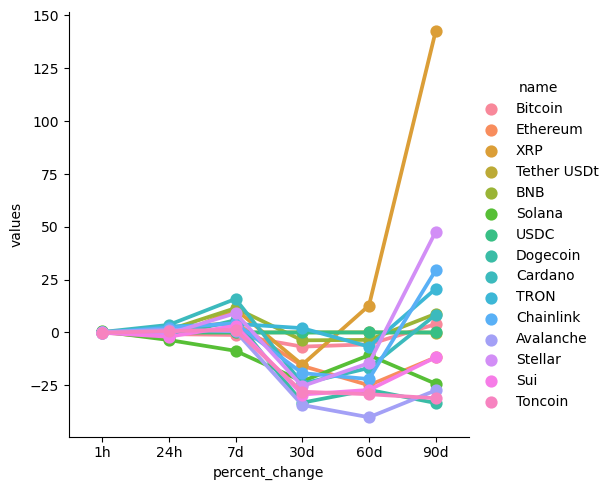

In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [22]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,96327.51724,2025-02-17 18:37:35.980846
0,Bitcoin,96334.61489,2025-02-17 18:38:55.249449
0,Bitcoin,96343.26358,2025-02-17 18:39:56.279699
0,Bitcoin,96343.26358,2025-02-17 18:40:58.647255
0,Bitcoin,96335.70035,2025-02-17 18:42:00.038582
0,Bitcoin,96334.22960,2025-02-17 18:43:00.501897


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

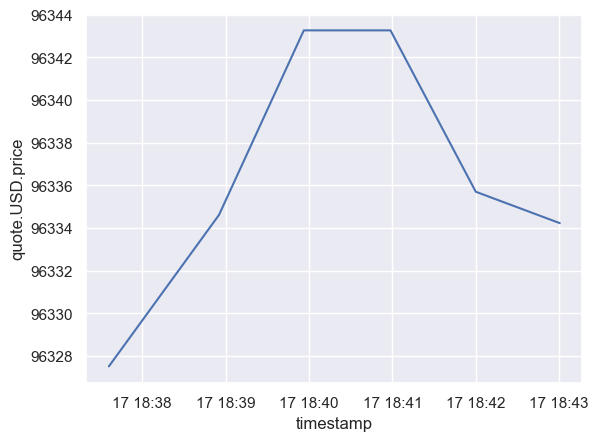

In [23]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)